Name : **Nisarga Arsikere Chidananda**

Student_ID : **A05289369**

## Analyzing Profit Data across Regions, Categories, and Sub-categories.

### Introduction

In the competitive retail industry, companies constantly seek opportunities to optimize their operations and maximize profits. Understanding the distribution of profit across different regions, categories, and sub-categories can provide valuable insights for making informed strategic decisions. In this analysis, we'll explore the profit data from the Superstore dataset to identify potential areas for improvement and strategic business decisions.

In [90]:
# importing the necessary libraries 
import pandas as pd
import matplotlib.pyplot as plt

In [91]:
# Load the data into a DataFrame
superstore_df = pd.read_excel('/Users/harshams/Desktop/CIS5357_Assignments/Assignment12/Superstore.xlsx',sheet_name = 'Orders')

In [3]:
superstore_df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,US-2019-103800,2019-01-03,2019-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,...,77095,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512
1,2,US-2019-112326,2019-01-04,2019-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870
2,3,US-2019-112326,2019-01-04,2019-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717
3,4,US-2019-112326,2019-01-04,2019-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748
4,5,US-2019-141817,2019-01-05,2019-01-12,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,...,19143,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10189,10190,US-2022-143259,2022-12-30,2023-01-03,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,...,10009,East,OFF-BI-10003684,Office Supplies,Binders,Wilson Jones Legal Size Ring Binders,52.776,3,0.2,19.7910
10190,10191,US-2022-115427,2022-12-30,2023-01-03,Standard Class,EB-13975,Erica Bern,Corporate,United States,Fairfield,...,94533,West,OFF-BI-10004632,Office Supplies,Binders,GBC Binding covers,20.720,2,0.2,6.4750
10191,10192,US-2022-156720,2022-12-30,2023-01-03,Standard Class,JM-15580,Jill Matthias,Consumer,United States,Loveland,...,80538,West,OFF-FA-10003472,Office Supplies,Fasteners,Bagged Rubber Bands,3.024,3,0.2,-0.6048
10192,10193,US-2022-143259,2022-12-30,2023-01-03,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,...,10009,East,TEC-PH-10004774,Technology,Phones,Gear Head AU3700S Headset,90.930,7,0.0,2.7279


In [4]:
superstore_df.shape

(10194, 21)

In [5]:
# checking the Null values in columns
superstore_df.isnull().sum(axis=0)

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country/Region    0
City              0
State/Province    0
Postal Code       0
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
dtype: int64

In [6]:
# checking the Null values in rows
superstore_df.isnull().sum(axis=1)

0        0
1        0
2        0
3        0
4        0
        ..
10189    0
10190    0
10191    0
10192    0
10193    0
Length: 10194, dtype: int64

In [7]:
superstore_df[superstore_df.isnull().sum(axis=1)==1]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit


In [8]:
# checking for duplicate values
superstore_df[superstore_df.duplicated()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit


In [9]:
superstore_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10194 entries, 0 to 10193
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          10194 non-null  int64         
 1   Order ID        10194 non-null  object        
 2   Order Date      10194 non-null  datetime64[ns]
 3   Ship Date       10194 non-null  datetime64[ns]
 4   Ship Mode       10194 non-null  object        
 5   Customer ID     10194 non-null  object        
 6   Customer Name   10194 non-null  object        
 7   Segment         10194 non-null  object        
 8   Country/Region  10194 non-null  object        
 9   City            10194 non-null  object        
 10  State/Province  10194 non-null  object        
 11  Postal Code     10194 non-null  object        
 12  Region          10194 non-null  object        
 13  Product ID      10194 non-null  object        
 14  Category        10194 non-null  object        
 15  Su

In [10]:
superstore_df['Region'].unique()

array(['Central', 'East', 'South', 'West'], dtype=object)

In [11]:
superstore_df['Category'].unique()

array(['Office Supplies', 'Furniture', 'Technology'], dtype=object)

In [12]:
superstore_df['Sub-Category'].unique()

array(['Paper', 'Binders', 'Labels', 'Storage', 'Art', 'Chairs',
       'Fasteners', 'Phones', 'Furnishings', 'Accessories', 'Bookcases',
       'Envelopes', 'Appliances', 'Tables', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

### Analyzing Profit by Region

#### Method1

In [13]:
# grouping the profit by region and calculate the average profit
region_profit_mean = superstore_df.groupby('Region')['Profit'].mean()

In [14]:
# Sort the regions by average profit in descending order
region_profit_mean.sort_values(ascending = False)

Region
West       34.060503
East       31.776042
South      28.857673
Central    17.072937
Name: Profit, dtype: float64

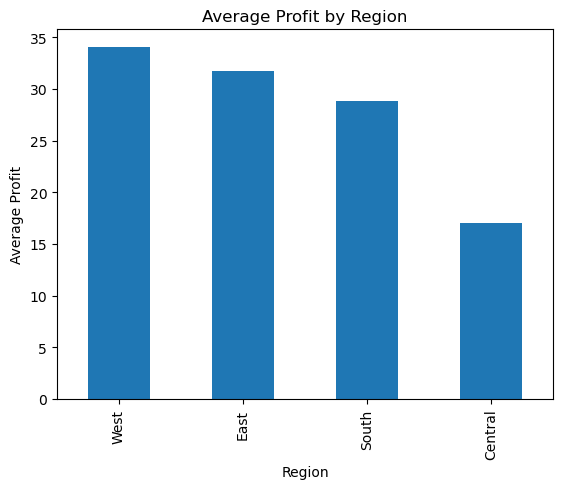

In [15]:
# visualizing the data using bar plot
region_profit_mean.sort_values(ascending = False).plot(kind='bar')
plt.ylabel("Average Profit")
plt.title("Average Profit by Region")
plt.show()

#### Insights:

* We noticed the **West** region has the hightest Profit with the average of 34.060503, followed by region **East** with the average profit of 31.776042, Next is region **South** with the average profit of 28.857673 and the region **Central** have the least profit with the average of 17.072937.



#### Recommendations to strategic business decision:

* Focus marketing efforts on the most profitable regions to increase sales and revenue.
* Consider expanding operations or establishing new retail locations in the regions with the highest profit.
* In order to improve the average profit in the low profit regions, the companies should collaborate with local businesses, distributors, or suppliers to leverage their networks and gain insights into regional market dynamics. Forge strategic partnerships to expand market reach and enhance profitability through mutual growth opportunities.

#### Method2

In [57]:
#using the aggregate function
Region_Profit_avg = superstore_df.groupby('Region').agg({'Profit': ['count','mean','std','sum']})

In [58]:
Region_Profit_avg

Profit                                    
         count       mean         std          sum
Region                                            
Central   2335  17.072937  290.749377   39865.3070
East      2986  31.776042  246.113599   94883.2603
South     1620  28.857673  212.893088   46749.4303
West      3253  34.060503  174.391944  110798.8170

In [59]:
#using the aggregate function
Region_Profit_avg = superstore_df.groupby('Region').agg({'Profit': ['count','mean','std','sum']}).unstack()

In [163]:
Region_Profit_avg.sort_values(ascending = False)

               Region 
Profit  sum    West       110798.817000
               East        94883.260300
               South       46749.430300
               Central     39865.307000
        count  West         3253.000000
               East         2986.000000
               Central      2335.000000
               South        1620.000000
        std    Central       290.749377
               East          246.113599
               South         212.893088
               West          174.391944
        mean   West           34.060503
               East           31.776042
               South          28.857673
               Central        17.072937
dtype: float64

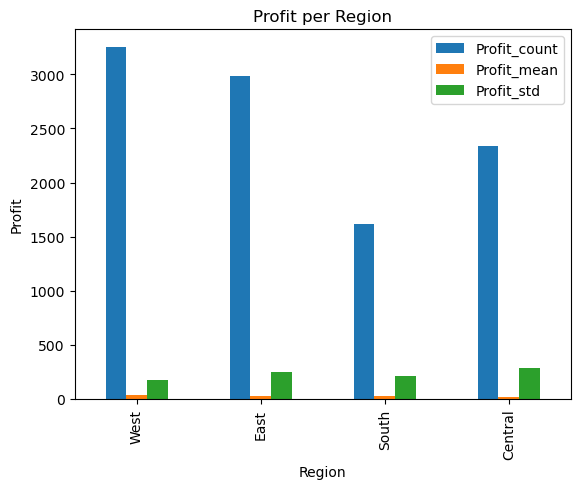

In [62]:
superstore_df.groupby('Region').agg({'Profit': ['count','mean','std']}).sort_values(by=('Profit','mean'),ascending=False).plot(kind='bar')
plt.legend(['Profit_count','Profit_mean','Profit_std'])
plt.title("Profit per Region")
plt.ylabel("Profit")
plt.show()

#### Insights:

* When we consider the **count** :
The region with the highest profit count is West, followed by East and Central, while the region with the least profit count is South.

* When we consider the **Mean** :
The West region has the highest profit with an average of 34.060503, followed by the East region with an average profit of 31.776042. Next is the South region with an average profit of 28.857673, and finally, the Central region has the least profit with an average of 17.072937

* When we consider the **std** :
The Central region has the highest standard deviation of profit, followed by the East and South regions, while the West region has the lowest standard deviation of profit.


#### Recommendations to strategic business decision:

* Focus marketing efforts on the most profitable regions to increase sales and revenue.
* Consider expanding operations or establishing new retail locations in the regions with the highest profit.
* In order to improve the average profit in the low profit regions, the companies should collaborate with local businesses, distributors, or suppliers to leverage their networks and gain insights into regional market dynamics. Forge strategic partnerships to expand market reach and enhance profitability through mutual growth opportunities.

### Analyzing Profit by Category

#### Method1

In [16]:
# grouping the profit by Category and calculate the average profit
Category_profit_mean = superstore_df.groupby('Category')['Profit'].mean()

In [17]:
# Sort the Category by average profit in descending order
Category_profit_mean.sort_values(ascending = False)

Category
Technology         78.575537
Office Supplies    20.565183
Furniture           8.964105
Name: Profit, dtype: float64

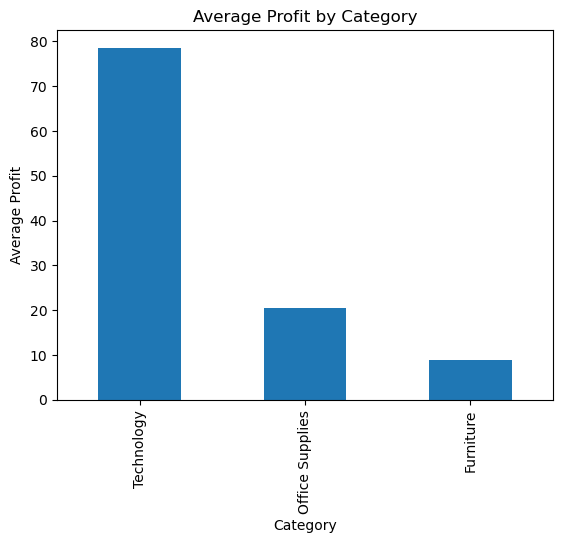

In [18]:
# visualizing the data using bar plot
Category_profit_mean.sort_values(ascending = False).plot(kind='bar')
plt.ylabel("Average Profit")
plt.title("Average Profit by Category")
plt.show()

#### Insights:

* We noticed that Category **Technology** has the hightest Profit with the average of **78.575537**, followed by the Category **Office Supplies** with the average profit of **20.565183** and Category **Furniture** has the lease profit with the average of **8.964105**


#### Recommendations to strategic business decision:

* Prioritize inventory management and product development for these high-profit categories.
* Implement targeted promotions and discounts to attract more customers to these categories.
* Implement loyalty programs or exclusive offers for customers who frequently purchase from the high-profit categories to foster repeat business.
* Develop targeted marketing campaigns specifically designed to promote the high-profit categories. Utilize various channels such as digital advertising, social media, and email marketing to highlight the unique features and benefits of products within these categories. Consider using customer testimonials or success stories to build credibility and attract a wider audience.

#### Method2

In [70]:
#using the aggregate function
Category_Profit_avg = superstore_df.groupby('Category').agg({'Profit': ['count','mean','std','sum']})

In [72]:
Category_Profit_avg.sort_values(by = ('Profit','mean'),ascending = False)

Profit                                    
                 count       mean         std          sum
Category                                                  
Technology        1865  78.575537  426.870560  146543.3756
Office Supplies   6128  20.565183  164.515554  126023.4434
Furniture         2201   8.964105  133.898108   19729.9956

In [73]:
Category_Profit_avg = superstore_df.groupby('Category').agg({'Profit': ['count','mean','std','sum']}).unstack()

In [74]:
Category_Profit_avg

               Category       
Profit  count  Furniture            2201.000000
               Office Supplies      6128.000000
               Technology           1865.000000
        mean   Furniture               8.964105
               Office Supplies        20.565183
               Technology             78.575537
        std    Furniture             133.898108
               Office Supplies       164.515554
               Technology            426.870560
        sum    Furniture           19729.995600
               Office Supplies    126023.443400
               Technology         146543.375600
dtype: float64

In [61]:
Category_Profit_avg.sort_values(ascending = False)

               Category       
Profit  sum    Technology         146543.375600
               Office Supplies    126023.443400
               Furniture           19729.995600
        count  Office Supplies      6128.000000
               Furniture            2201.000000
               Technology           1865.000000
        std    Technology            426.870560
               Office Supplies       164.515554
               Furniture             133.898108
        mean   Technology             78.575537
               Office Supplies        20.565183
               Furniture               8.964105
dtype: float64

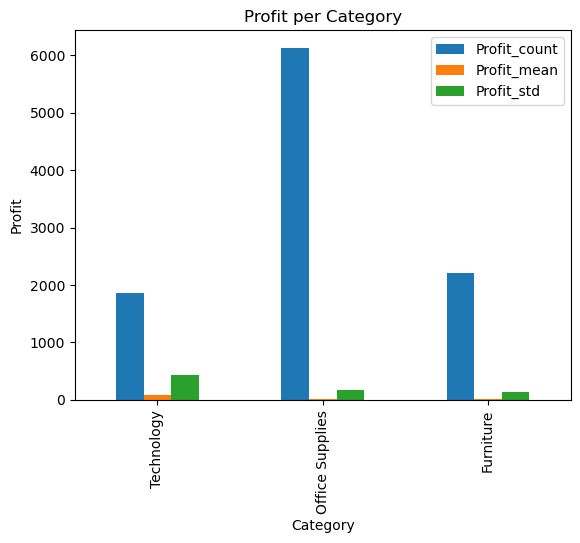

In [68]:
superstore_df.groupby('Category').agg({'Profit': ['count','mean','std']}).sort_values(by=('Profit','mean'),ascending=False).plot(kind='bar')
plt.legend(['Profit_count','Profit_mean','Profit_std'])
plt.title("Profit per Category")
plt.ylabel("Profit")
plt.show()

#### Insights:

* When we consider the **count** :
The Category with the highest profit count is Office Supplies, followed by the category Furniture, while the Category with the least profit count is Technology. 

* When we consider the **Mean** :
We noticed that Category Technology has the hightest Profit with the average of 78.575537, followed by the Category Office Supplies with the average profit of 20.565183 and Category Furniture has the lease profit with the average of 8.964105

* When we consider the **std** :
The Category Technology has the highest standard deviation of profit, followed by the Category Office Supplies, while the Category Furniture has the lowest standard deviation of profit.


#### Recommendations to strategic business decision:

* Prioritize inventory management and product development for these high-profit categories.
* Implement targeted promotions and discounts to attract more customers to these categories.
* Implement loyalty programs or exclusive offers for customers who frequently purchase from the high-profit categories to foster repeat business.
* Develop targeted marketing campaigns specifically designed to promote the high-profit categories. Utilize various channels such as digital advertising, social media, and email marketing to highlight the unique features and benefits of products within these categories. Consider using customer testimonials or success stories to build credibility and attract a wider audience.

### Analyzing Profit by Sub-Category

#### Method1

In [83]:
# grouping the profit by Sub-Category and calculate the average profit
Sub_Category_profit_mean = superstore_df.groupby('Sub-Category')['Profit'].mean()

In [161]:
# Sort the Sub-Category by average profit in descending order
Sub_Category_profit_mean.sort_values(ascending = False).reset_index()

,Sub-Category,Profit
0,Copiers,801.341950
1,Accessories,54.111788
2,Phones,49.890173
3,Chairs,42.939325
4,Appliances,38.669798
5,Machines,29.589546
6,Envelopes,27.296971
7,Paper,24.936060
8,Storage,24.865784
9,Binders,20.301098


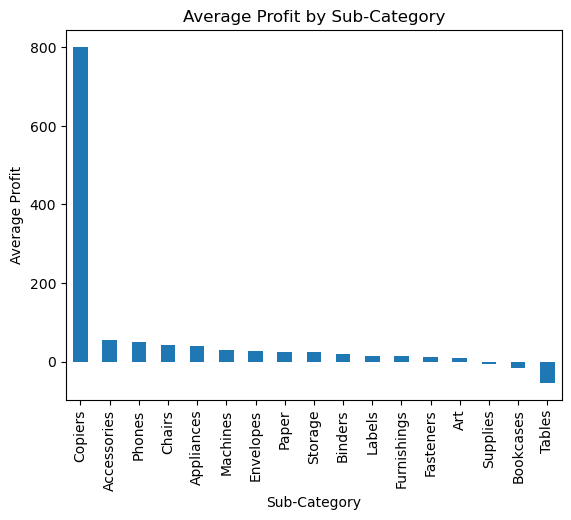

In [80]:
# visualizing the data using bar plot
Sub_Category_profit_mean.sort_values(ascending = False).plot(kind='bar')
plt.ylabel("Average Profit")
plt.title("Average Profit by Sub-Category")
plt.show()

#### Insights:

* We noticed that Sub-Category **Copiers** has the hightest Profit with the average of **801.341950**, followed by the Sub-Category Accessories,Phones,Chairs,Appliances,Machines,Envelopes,Paper,Storage,Binders,Labels,Furnishings,Fasteners,Art, Supplies,Bookcases and Sub-Category **Tables** has the lease profit with the average of **-54.457687**

#### Recommendations to strategic business decision:

* Allocate more shelf space and marketing resources to these high-profit sub-categories.
* Consider offering specialized customer service or training for these products to enhance customer satisfaction and increase sales.
* Strengthen the online presence of high-profit sub-categories through optimized product listings, engaging content, and targeted online advertising. Emphasize the convenience of online shopping for these products and explore e-commerce partnerships or platforms.
* the key is to approach the improvement of low-profit sub-categories with a combination of cost management, strategic marketing, and product diversification to create a more sustainable and profitable product line.





#### Method2

In [99]:
#using the aggregate function
Sub_Category_Profit_avg = superstore_df.groupby('Sub-Category').agg({'Profit': ['count','mean','std','sum']})

In [101]:
Sub_Category_Profit_avg.sort_values(by =('Profit','mean'),ascending = False)

Profit                                     
              count        mean          std         sum
Sub-Category                                            
Copiers          70  801.341950  1443.408095  56093.9365
Accessories     775   54.111788   106.155455  41936.6357
Phones          903   49.890173   112.493176  45050.8265
Chairs          634   42.939325   126.095096  27223.5323
Appliances      474   38.669798   147.098442  18329.4844
Machines        117   29.589546  1089.554785   3461.9769
Envelopes       256   27.296971    35.244804   6988.0247
Paper          1384   24.936060    35.598865  34511.5070
Storage         856   24.865784    81.510516  21285.1115
Binders        1548   20.301098   303.893602  31426.1003
Labels          368   15.143418    34.063877   5572.7780
Furnishings    1009   13.767833    51.797620  13891.7430
Fasteners       229   10.605397    89.185496   2428.6358
Art             821    8.103771    13.271914   6653.1962
Supplies        192   -6.101013   104.519686  -1171.3945
Bookcases       232  -15.655490   180.647057  -3632.0736
Tables          326  -54.457687   228.228516 -17753.2061

In [103]:
#Top5 Sub-Categories when it is sorted by average Profit
Sub_Category_Profit_avg.sort_values(by =('Profit','mean'),ascending = False).head()

Profit                                     
              count        mean          std         sum
Sub-Category                                            
Copiers          70  801.341950  1443.408095  56093.9365
Accessories     775   54.111788   106.155455  41936.6357
Phones          903   49.890173   112.493176  45050.8265
Chairs          634   42.939325   126.095096  27223.5323
Appliances      474   38.669798   147.098442  18329.4844

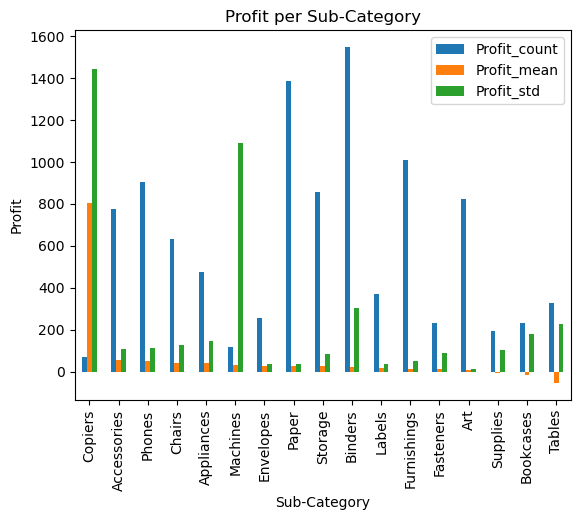

In [104]:
superstore_df.groupby('Sub-Category').agg({'Profit': ['count','mean','std']}).sort_values(by=('Profit','mean'),ascending=False).plot(kind='bar')
plt.legend(['Profit_count','Profit_mean','Profit_std'])
plt.title("Profit per Sub-Category")
plt.ylabel("Profit")
plt.show()

### Visualizing the Top5 and Bottom5 Sub-Categories when it sorted by Profit (mean , count , std):

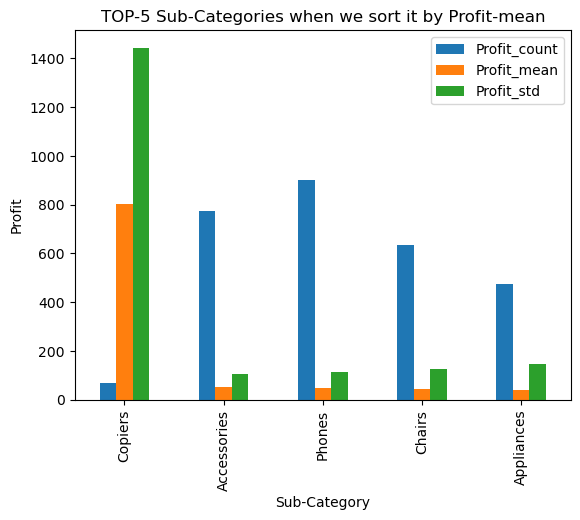

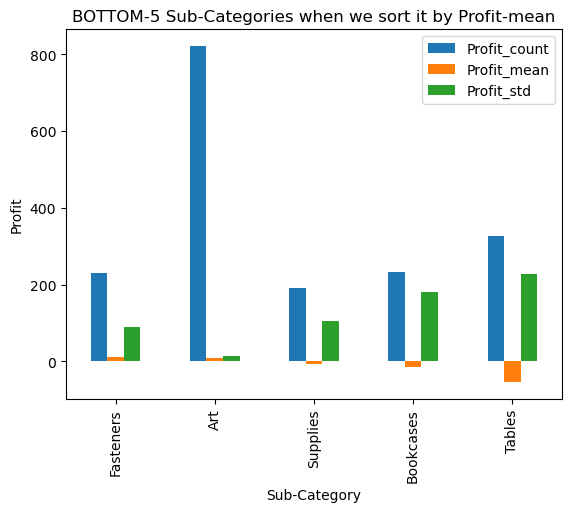

In [115]:
#Visualizing the Top5 Sub-Categories when we sort it by Profit-mean
superstore_df.groupby('Sub-Category').agg({'Profit': ['count','mean','std']}).sort_values(by=('Profit','mean'),ascending=False).head().plot(kind='bar')
plt.legend(['Profit_count','Profit_mean','Profit_std'])
plt.title("TOP-5 Sub-Categories when we sort it by Profit-mean")
plt.ylabel("Profit")
plt.show()

#Visualizing the Bottom5 Sub-Categories when we sort it by Profit-mean
superstore_df.groupby('Sub-Category').agg({'Profit': ['count','mean','std']}).sort_values(by=('Profit','mean'),ascending=False).tail().plot(kind='bar')
plt.legend(['Profit_count','Profit_mean','Profit_std'])
plt.title("BOTTOM-5 Sub-Categories when we sort it by Profit-mean")
plt.ylabel("Profit")
plt.show()

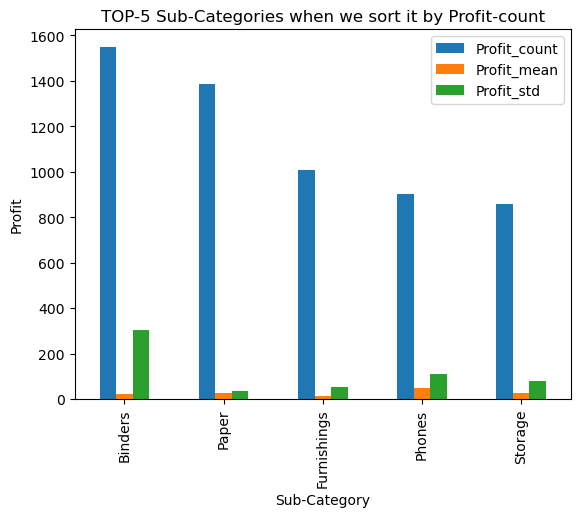

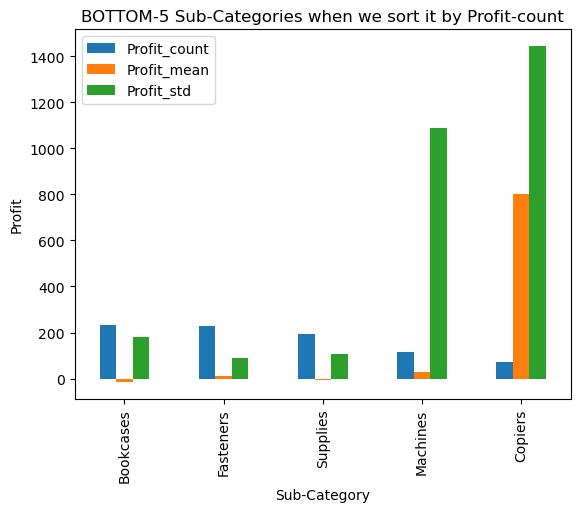

In [116]:
#Visualizing the Top5 Sub-Categories when we sort it by Profit-count
superstore_df.groupby('Sub-Category').agg({'Profit': ['count','mean','std']}).sort_values(by=('Profit','count'),ascending=False).head().plot(kind='bar')
plt.legend(['Profit_count','Profit_mean','Profit_std'])
plt.title("TOP-5 Sub-Categories when we sort it by Profit-count")
plt.ylabel("Profit")
plt.show()

#Visualizing the Bottom5 Sub-Categories when we sort it by Profit-count
superstore_df.groupby('Sub-Category').agg({'Profit': ['count','mean','std']}).sort_values(by=('Profit','count'),ascending=False).tail().plot(kind='bar')
plt.legend(['Profit_count','Profit_mean','Profit_std'])
plt.title("BOTTOM-5 Sub-Categories when we sort it by Profit-count")
plt.ylabel("Profit")
plt.show()

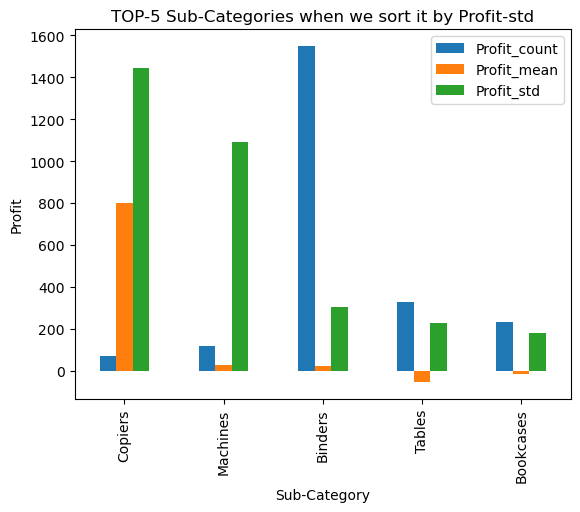

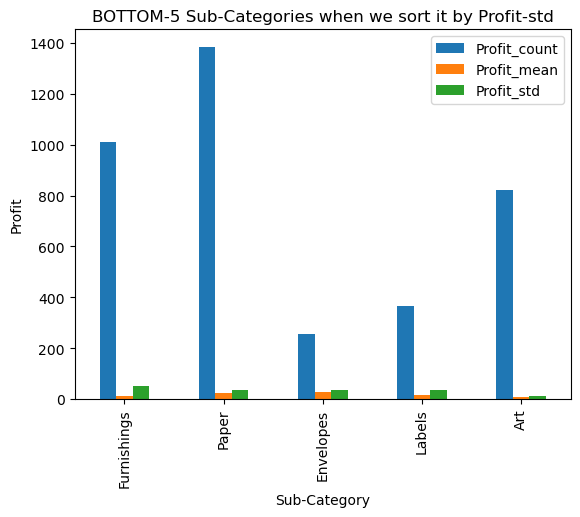

In [117]:
#Visualizing the Top5 Sub-Categories when we sort it by Profit-std
superstore_df.groupby('Sub-Category').agg({'Profit': ['count','mean','std']}).sort_values(by=('Profit','std'),ascending=False).head().plot(kind='bar')
plt.legend(['Profit_count','Profit_mean','Profit_std'])
plt.title("TOP-5 Sub-Categories when we sort it by Profit-std")
plt.ylabel("Profit")
plt.show()

#Visualizing the Bottom5 Sub-Categories when we sort it by Profit-std
superstore_df.groupby('Sub-Category').agg({'Profit': ['count','mean','std']}).sort_values(by=('Profit','std'),ascending=False).tail().plot(kind='bar')
plt.legend(['Profit_count','Profit_mean','Profit_std'])
plt.title("BOTTOM-5 Sub-Categories when we sort it by Profit-std")
plt.ylabel("Profit")
plt.show()

### Grouping by Region , Category and Sub-Category and Calculating Average Profit

In [118]:
superstore_df.groupby(['Region','Category','Sub-Category'])['Profit'].mean().reset_index()

,Region,Category,Sub-Category,Profit
0,Central,Furniture,Bookcases,-39.958086
1,Central,Furniture,Chairs,42.761944
2,Central,Furniture,Furnishings,-18.915533
3,Central,Furniture,Tables,-49.439589
4,Central,Office Supplies,Appliances,-21.452175
...,...,...,...,...
63,West,Office Supplies,Supplies,9.073138
64,West,Technology,Accessories,63.893792
65,West,Technology,Copiers,773.089404
66,West,Technology,Machines,-13.212351


In [113]:
Average_profit = superstore_df.groupby(['Region','Category','Sub-Category'])['Profit'].mean()

In [157]:
#Sorting in descending order by Average profit
Average_profit.sort_values(ascending= False).reset_index()

,Region,Category,Sub-Category,Profit
0,Central,Technology,Copiers,975.552581
1,East,Technology,Copiers,795.406973
2,West,Technology,Copiers,773.089404
3,South,Technology,Copiers,522.700957
4,East,Technology,Machines,187.260619
...,...,...,...,...
63,Central,Furniture,Tables,-49.439589
64,Central,Technology,Machines,-70.765076
65,South,Technology,Machines,-79.938500
66,South,Furniture,Tables,-90.648194


In [156]:
#Displaying the Top5
Average_profit.sort_values(ascending= False).head().reset_index()

,Region,Category,Sub-Category,Profit
0,Central,Technology,Copiers,975.552581
1,East,Technology,Copiers,795.406973
2,West,Technology,Copiers,773.089404
3,South,Technology,Copiers,522.700957
4,East,Technology,Machines,187.260619


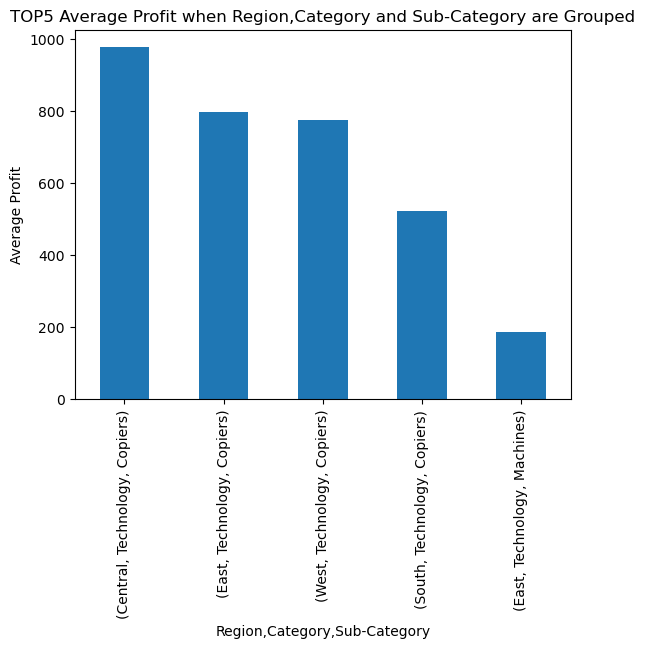

In [158]:
#Visualizing the average profit of Top5 when Region,Category and Sub-Category are Grouped
Average_profit.sort_values(ascending= False).head().plot(x=['Region','Category','Sub-Category'],y='Profit',kind='bar')
plt.ylabel("Average Profit")
plt.title("TOP5 Average Profit when Region,Category and Sub-Category are Grouped")
plt.show()

#### Insights :

##### Top5 Average Profit Regions,Category and Sub-Categories when Region,Category and Sub-Category are Grouped

1. (Central,Technology, Copiers)
2. (East,   Technology,	Copiers)	
3. (West,   Technology,	Copiers)	
4. (South,  Technology,	Copiers)	
5. (East,   Technology,	Machines)	

#### Recommendations to strategic business decision:

* Focus marketing efforts on the most profitable regions to increase sales and revenue.
* Consider expanding operations or establishing new retail locations in the regions with the highest profit.
* Prioritize inventory management and product development for these high-profit categories.
* Implement targeted promotions and discounts to attract more customers to these categories.
* Implement loyalty programs or exclusive offers for customers who frequently purchase from the high-profit categories to foster repeat business.
* Allocate more shelf space and marketing resources to these high-profit sub-categories.
* Consider offering specialized customer service or training for these products to enhance customer satisfaction and increase sales.
* Strengthen the online presence of high-profit sub-categories through optimized product listings, engaging content, and targeted online advertising. Emphasize the convenience of online shopping for these products and explore e-commerce partnerships or platforms.

In [114]:
#Displaying the Bottom5
Average_profit.sort_values(ascending= False).tail().reset_index()

,Region,Category,Sub-Category,Profit
0,Central,Furniture,Tables,-49.439589
1,Central,Technology,Machines,-70.765076
2,South,Technology,Machines,-79.938500
3,South,Furniture,Tables,-90.648194
4,East,Furniture,Tables,-130.425260


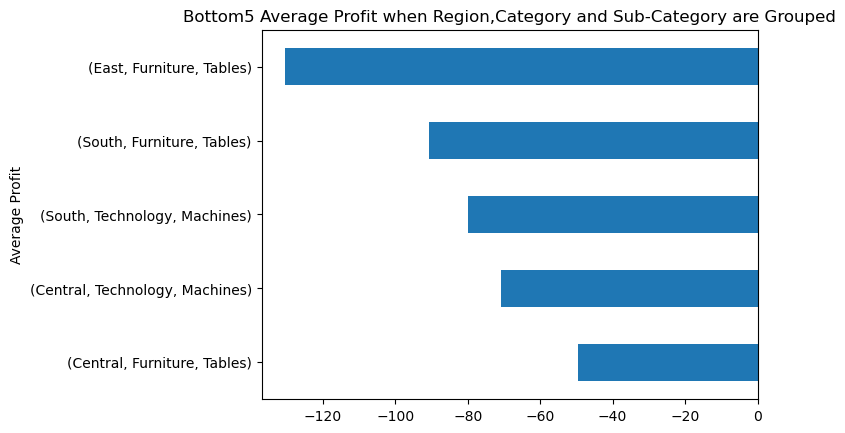

In [116]:
#Visualizing the average profit of Bottom5 when Region,Category and Sub-Category are Grouped
Average_profit.sort_values(ascending= False).tail().plot(x=['Region','Category','Sub-Category'],y='Profit',kind='barh')
plt.ylabel("Average Profit")
plt.title("Bottom5 Average Profit when Region,Category and Sub-Category are Grouped")
plt.show()

#### Insights :

##### Bottom5 Average Profit Regions,Category and Sub-Categories when Region,Category and Sub-Category are Grouped

1. (Central	,Furniture	,Tables)
2. (Central	,Technology	,Machines)	
3. (South	,Technology	,Machines)	
4. (South	,Furniture	,Tables)
5. (East	,Furniture	,Tables)

#### Recommendations to strategic business decision:

* In order to improve the average profit in the low profit regions, the companies should collaborate with local businesses, distributors, or suppliers to leverage their networks and gain insights into regional market dynamics. Forge strategic partnerships to expand market reach and enhance profitability through mutual growth opportunities.
* Develop targeted marketing campaigns, Utilize various channels such as digital advertising, social media, and email marketing to highlight the unique features and benefits of products within these categories. Consider using customer testimonials or success stories to build credibility and attract a wider audience.
* the key is to approach the improvement of low-profit sub-categories with a combination of cost management, strategic marketing, and product diversification to create a more sustainable and profitable product line.

### Grouping Region,Category,Sub-Category and using the aggregation function to display the Profit (sum,count,mean and std)

#### TOP 5

In [92]:
#using aggregation function and displaying the Top5(when it is sorted by sum)
superstore_df.groupby(['Region','Category','Sub-Category']).agg({'Profit':['sum','count','mean','std']}).sort_values(by=('Profit','sum'),ascending = False).head()

Profit                    \
                                             sum count        mean   
Region  Category        Sub-Category                                 
West    Technology      Copiers       19327.2351    25  773.089404   
East    Technology      Copiers       17498.9534    22  795.406973   
West    Technology      Accessories   16484.5983   258   63.893792   
        Office Supplies Binders       16096.8016   471   34.175800   
Central Technology      Copiers       15608.8413    16  975.552581   

                                                   
                                              std  
Region  Category        Sub-Category               
West    Technology      Copiers       1305.090672  
East    Technology      Copiers       1336.018151  
West    Technology      Accessories    114.752679  
        Office Supplies Binders        160.662836  
Central Technology      Copiers       2049.424763

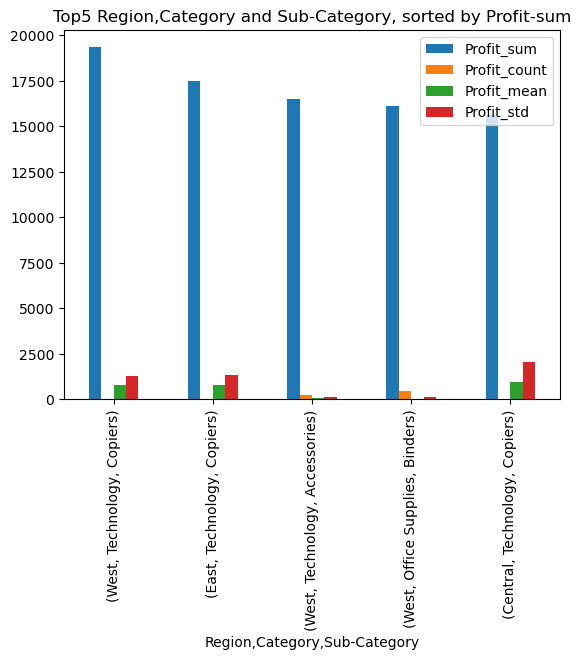

In [96]:
#Visualizing Top5 Region,Category and Sub-Category when it is sorted by Profit-sum.
superstore_df.groupby(['Region','Category','Sub-Category']).agg({'Profit':['sum','count','mean','std']}).sort_values(by=('Profit','sum'),ascending = False).head().plot(kind='bar')
plt.legend(['Profit_sum','Profit_count','Profit_mean','Profit_std'])
plt.title("Top5 Region,Category and Sub-Category, sorted by Profit-sum")
plt.show()

In [93]:
#using aggregation function and displaying the Top5(when it is sorted by count)
superstore_df.groupby(['Region','Category','Sub-Category']).agg({'Profit':['sum','count','mean','std']}).sort_values(by=('Profit','count'),ascending = False).head()

Profit                             
                                             sum count       mean         std
Region  Category        Sub-Category                                         
West    Office Supplies Binders       16096.8016   471  34.175800  160.662836
East    Office Supplies Binders       12386.9398   459  26.986797  164.092511
West    Office Supplies Paper         12142.0672   452  26.862981   35.812299
East    Office Supplies Paper          9450.4779   390  24.231995   33.767120
Central Office Supplies Binders        -958.3051   372  -2.576089  508.342520

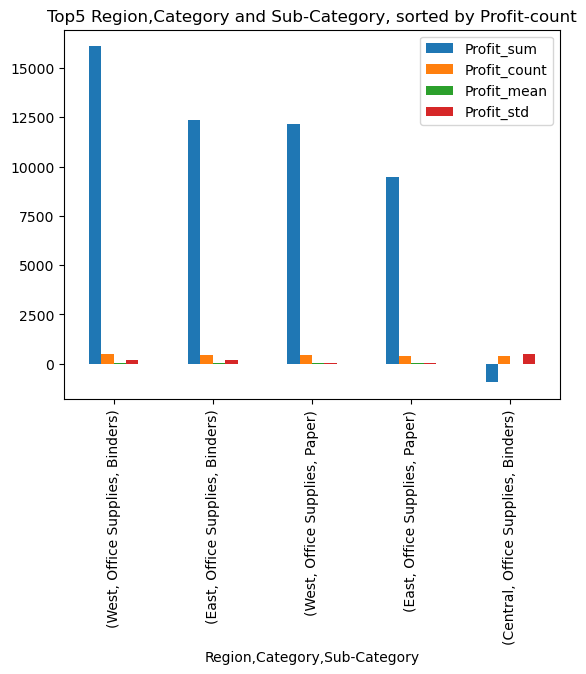

In [97]:
#Visualizing Top5 Region,Category and Sub-Category when it is sorted by Profit-count.
superstore_df.groupby(['Region','Category','Sub-Category']).agg({'Profit':['sum','count','mean','std']}).sort_values(by=('Profit','count'),ascending = False).head().plot(kind='bar')
plt.legend(['Profit_sum','Profit_count','Profit_mean','Profit_std'])
plt.title("Top5 Region,Category and Sub-Category, sorted by Profit-count")
plt.show()

In [94]:
#using aggregation function and displaying the Top5(when it is sorted by std)
superstore_df.groupby(['Region','Category','Sub-Category']).agg({'Profit':['sum','count','mean','std']}).sort_values(by=('Profit','std'),ascending = False).head()

Profit                               
                                        sum count        mean          std
Region  Category   Sub-Category                                           
Central Technology Copiers       15608.8413    16  975.552581  2049.424763
East    Technology Machines       6928.6429    37  187.260619  1563.660310
South   Technology Machines      -1438.8930    18  -79.938500  1356.849378
East    Technology Copiers       17498.9534    22  795.406973  1336.018151
West    Technology Copiers       19327.2351    25  773.089404  1305.090672

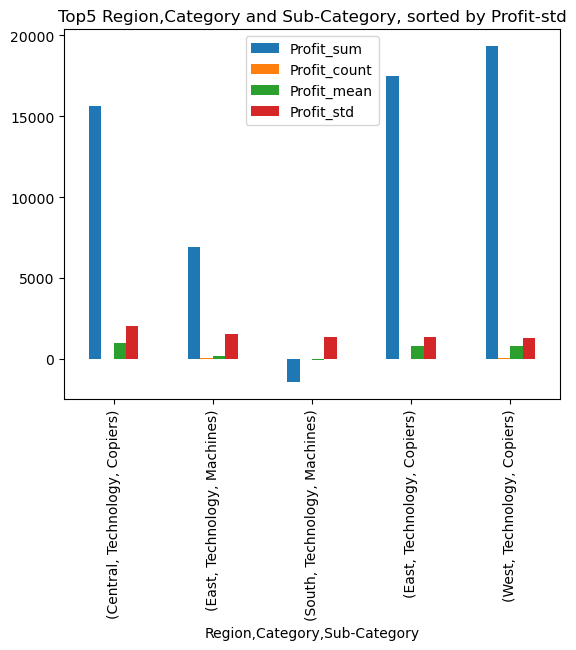

In [98]:
#Visualizing Top5 Region,Category and Sub-Category when it is sorted by Profit-std.
superstore_df.groupby(['Region','Category','Sub-Category']).agg({'Profit':['sum','count','mean','std']}).sort_values(by=('Profit','std'),ascending = False).head().plot(kind='bar')
plt.legend(['Profit_sum','Profit_count','Profit_mean','Profit_std'])
plt.title("Top5 Region,Category and Sub-Category, sorted by Profit-std")
plt.show()

In [95]:
#using aggregation function and displaying the Top5(when it is sorted by mean)
superstore_df.groupby(['Region','Category','Sub-Category']).agg({'Profit':['sum','count','mean','std']}).sort_values(by=('Profit','mean'),ascending = False).head()

Profit                               
                                        sum count        mean          std
Region  Category   Sub-Category                                           
Central Technology Copiers       15608.8413    16  975.552581  2049.424763
East    Technology Copiers       17498.9534    22  795.406973  1336.018151
West    Technology Copiers       19327.2351    25  773.089404  1305.090672
South   Technology Copiers        3658.9067     7  522.700957   473.006448
East    Technology Machines       6928.6429    37  187.260619  1563.660310

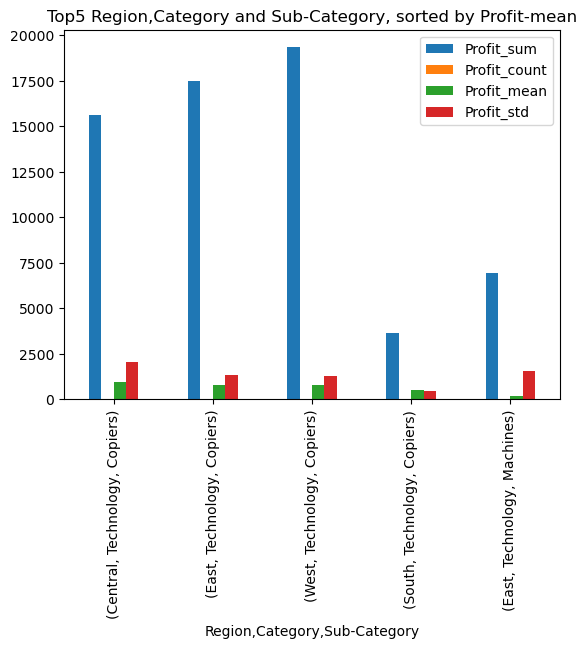

In [62]:
#Visualizing Top5 Region,Category and Sub-Category when it is sorted by Profit-mean.
superstore_df.groupby(['Region','Category','Sub-Category']).agg({'Profit':['sum','count','mean','std']}).sort_values(by=('Profit','mean'),ascending = False).head().plot(kind='bar')
plt.legend(['Profit_sum','Profit_count','Profit_mean','Profit_std'])
plt.title("Top5 Region,Category and Sub-Category, sorted by Profit-mean")
plt.show()

#### BOTTOM 5

In [99]:
#using aggregation function and displaying the Bottom5 (when it is sorted by sum)
superstore_df.groupby(['Region','Category','Sub-Category']).agg({'Profit':['sum','count','mean','std']}).sort_values(by=('Profit','sum'),ascending = False).tail()

Profit                              
                                             sum count        mean         std
Region  Category        Sub-Category                                          
Central Office Supplies Appliances    -2638.6175   123  -21.452175  211.238591
        Furniture       Tables        -3559.6504    72  -49.439589  177.485857
                        Furnishings   -3915.5153   207  -18.915533   80.069002
South   Furniture       Tables        -4623.0579    51  -90.648194  393.674387
East    Furniture       Tables       -11086.1471    85 -130.425260  146.827528

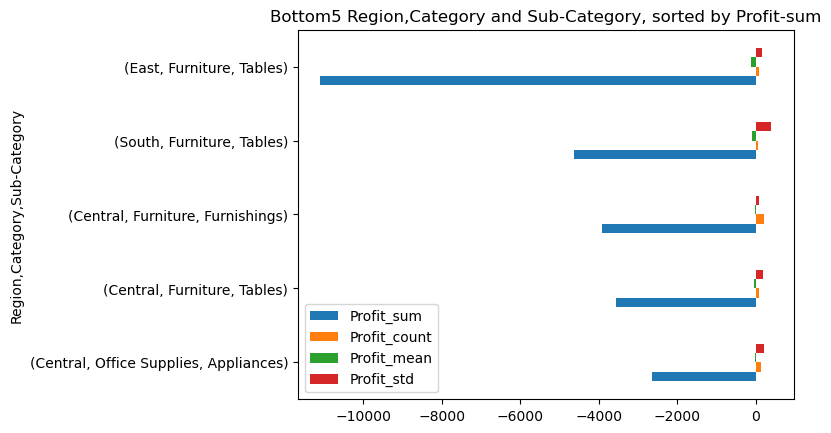

In [107]:
#Visualizing Bottom5 Region,Category and Sub-Category when it is sorted by Profit-sum.
superstore_df.groupby(['Region','Category','Sub-Category']).agg({'Profit':['sum','count','mean','std']}).sort_values(by=('Profit','sum'),ascending = False).tail().plot(kind='barh')
plt.legend(['Profit_sum','Profit_count','Profit_mean','Profit_std'])
plt.title("Bottom5 Region,Category and Sub-Category, sorted by Profit-sum")
plt.show()

In [101]:
#using aggregation function and displaying the Bottom5 (when it is sorted by count)
superstore_df.groupby(['Region','Category','Sub-Category']).agg({'Profit':['sum','count','mean','std']}).sort_values(by=('Profit','count'),ascending = False).tail()

Profit                               
                                        sum count        mean          std
Region  Category   Sub-Category                                           
East    Technology Copiers       17498.9534    22  795.406973  1336.018151
Central Technology Machines      -1486.0666    21  -70.765076   370.789516
South   Technology Machines      -1438.8930    18  -79.938500  1356.849378
Central Technology Copiers       15608.8413    16  975.552581  2049.424763
South   Technology Copiers        3658.9067     7  522.700957   473.006448

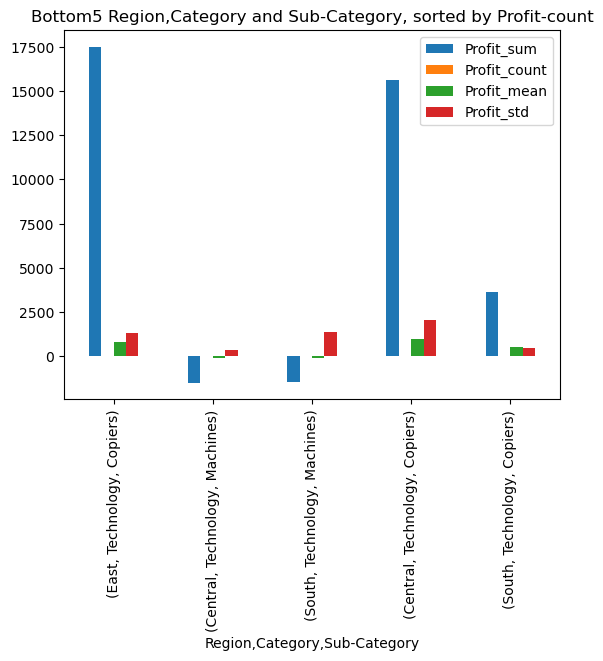

In [108]:
#Visualizing Bottom5 Region,Category and Sub-Category when it is sorted by Profit-count.
superstore_df.groupby(['Region','Category','Sub-Category']).agg({'Profit':['sum','count','mean','std']}).sort_values(by=('Profit','count'),ascending = False).tail().plot(kind='bar')
plt.legend(['Profit_sum','Profit_count','Profit_mean','Profit_std'])
plt.title("Bottom5 Region,Category and Sub-Category, sorted by Profit-count")
plt.show()

In [103]:
#using aggregation function and displaying the Bottom5 (when it is sorted by std)
superstore_df.groupby(['Region','Category','Sub-Category']).agg({'Profit':['sum','count','mean','std']}).sort_values(by=('Profit','std'),ascending = False).tail()

Profit                           
                                            sum count      mean        std
Region  Category        Sub-Category                                      
East    Office Supplies Art           1988.1643   247  8.049248  12.605145
Central Office Supplies Art           1195.1591   176  6.790677   9.654045
South   Office Supplies Fasteners      173.7181    29  5.990279   5.787274
Central Office Supplies Fasteners      236.6186    55  4.302156   5.460897
East    Office Supplies Fasteners      384.2688    71  5.412237   5.363357

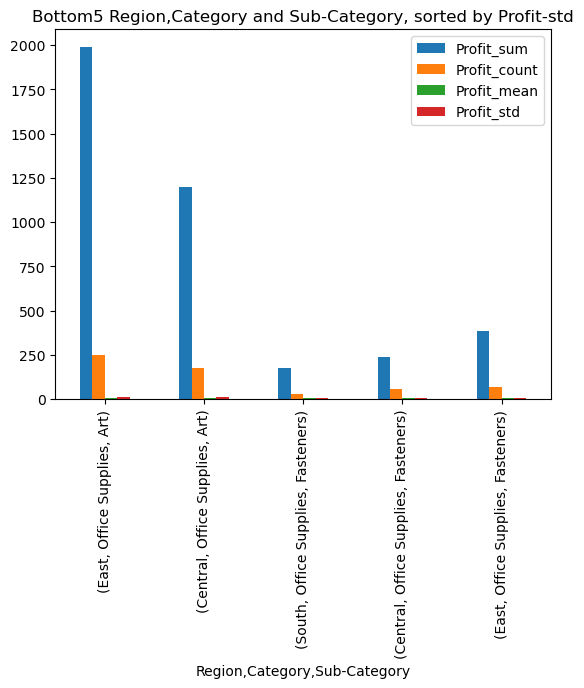

In [105]:
#Visualizing Bottom5 Region,Category and Sub-Category when it is sorted by Profit-std.
superstore_df.groupby(['Region','Category','Sub-Category']).agg({'Profit':['sum','count','mean','std']}).sort_values(by=('Profit','std'),ascending = False).tail().plot(kind='bar')
plt.legend(['Profit_sum','Profit_count','Profit_mean','Profit_std'])
plt.title("Bottom5 Region,Category and Sub-Category, sorted by Profit-std")
plt.show()

In [173]:
#using aggregation function and displaying the Bottom5 (when it is sorted by mean)
superstore_df.groupby(['Region','Category','Sub-Category']).agg({'Profit':['sum','count','mean','std']}).sort_values(by=('Profit','mean'),ascending = False).tail()

Profit                               
                                        sum count        mean          std
Region  Category   Sub-Category                                           
Central Furniture  Tables        -3559.6504    72  -49.439589   177.485857
        Technology Machines      -1486.0666    21  -70.765076   370.789516
South   Technology Machines      -1438.8930    18  -79.938500  1356.849378
        Furniture  Tables        -4623.0579    51  -90.648194   393.674387
East    Furniture  Tables       -11086.1471    85 -130.425260   146.827528

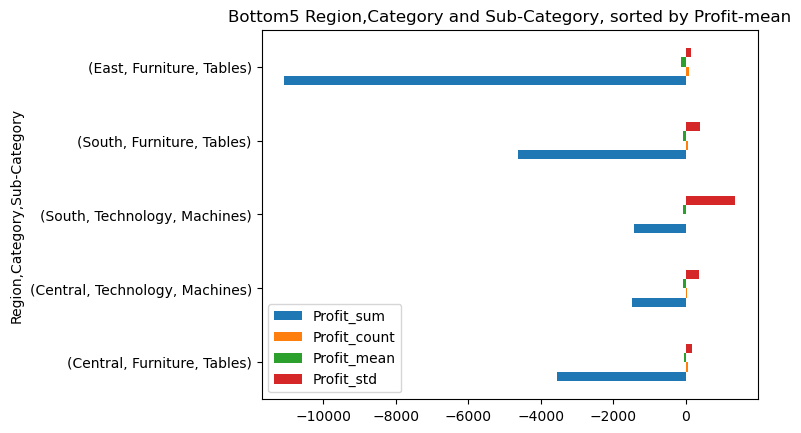

In [110]:
#Visualizing Bottom5 Region,Category and Sub-Category when it is sorted by Profit-mean.
superstore_df.groupby(['Region','Category','Sub-Category']).agg({'Profit':['sum','count','mean','std']}).sort_values(by=('Profit','mean'),ascending = False).tail().plot(kind='barh')
plt.legend(['Profit_sum','Profit_count','Profit_mean','Profit_std'])
plt.title("Bottom5 Region,Category and Sub-Category, sorted by Profit-mean")
plt.show()

In [64]:
agg_data = superstore_df.groupby(['Region','Category','Sub-Category']).agg({'Profit':['sum','count','mean','std']}).sort_values(by=('Profit','mean'),ascending = False)

In [74]:
heatmap_data =agg_data.unstack(level=-1)[('Profit','mean')]

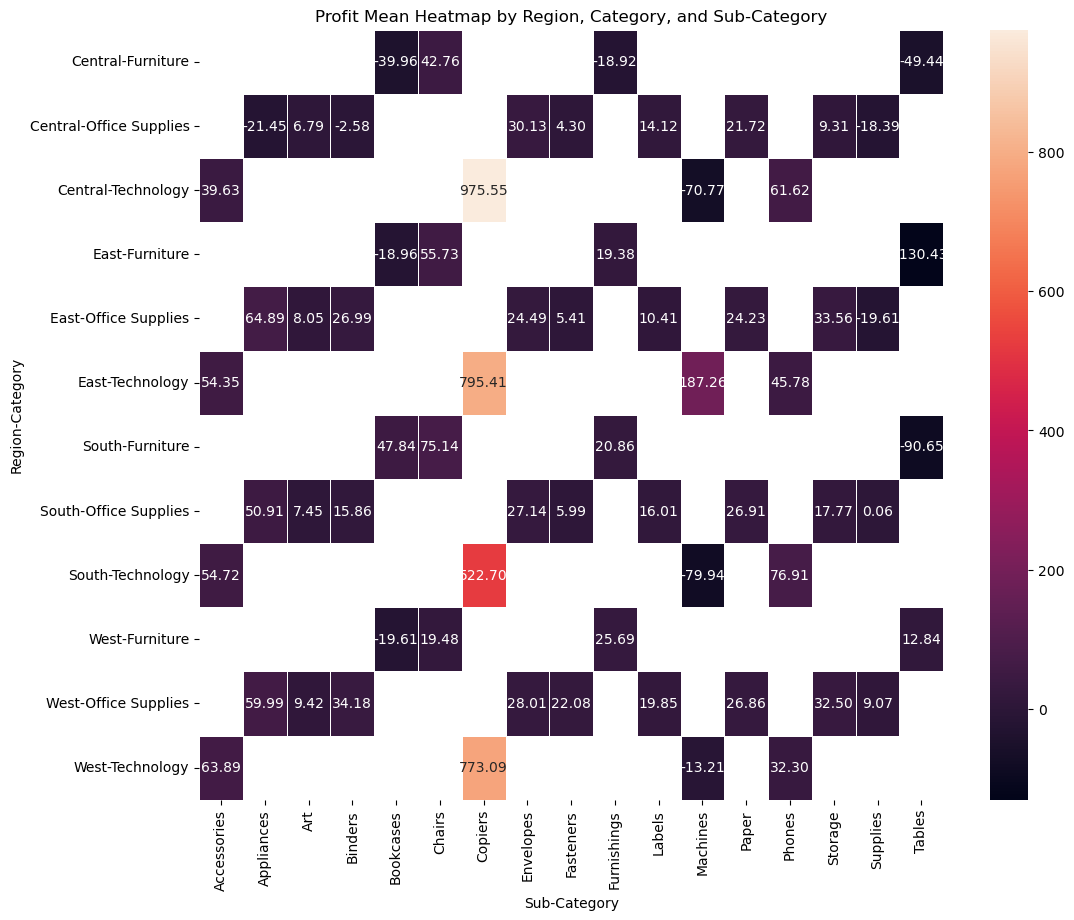

In [89]:
#Visualizing the data using heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(heatmap_data,annot=True, fmt=".2f", linewidths=.5)
plt.title('Profit Mean Heatmap by Region, Category, and Sub-Category')
plt.show()

### Conclusion

By analyzing profit data across different regions, categories, and sub-categories, the retailer can identify areas of strength and opportunities for improvement. Focusing on the most profitable regions, categories, and sub-categories can help the company optimize its operations, increase sales, and maximize profits. Additionally, understanding the performance of individual sub-categories can guide product development, marketing strategies, and inventory management decisions. By leveraging these insights, the retailer can make informed strategic decisions that drive business growth and profitability.